In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('zomato.csv')

In [7]:
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)') 
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '', regex=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df_cleaned = df.drop(columns=['phone']).dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])

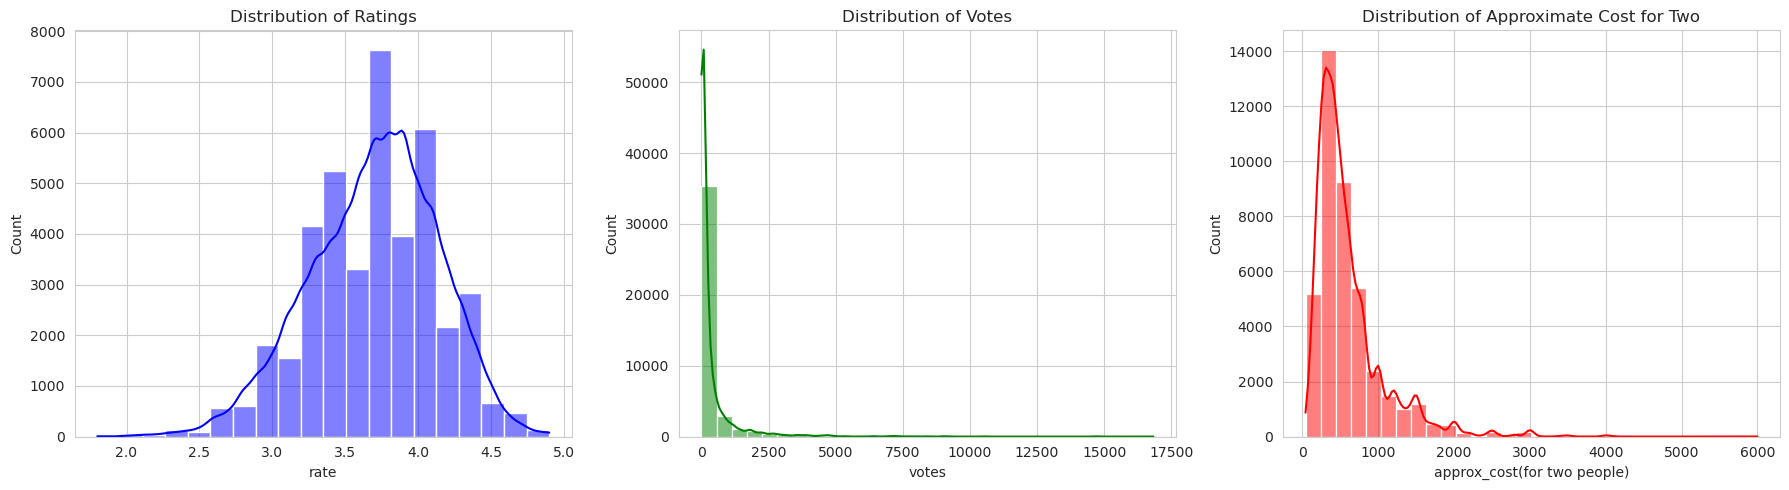

In [8]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_cleaned['rate'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Ratings')
sns.histplot(df_cleaned['votes'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Votes')
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Approximate Cost for Two')
plt.tight_layout()
plt.show()

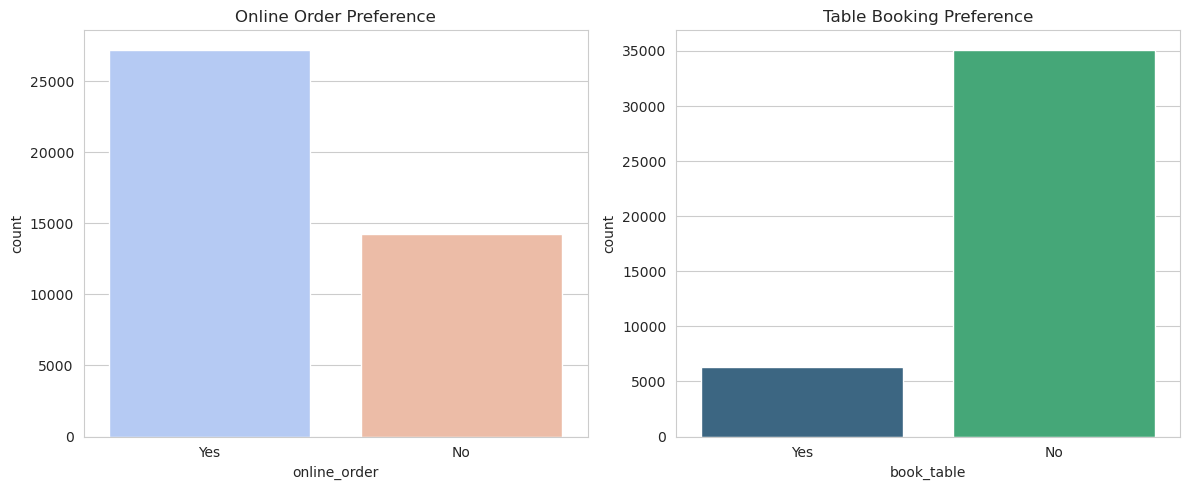

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=df_cleaned['online_order'], ax=axes[0], palette="coolwarm")
axes[0].set_title('Online Order Preference')
sns.countplot(x=df_cleaned['book_table'], ax=axes[1], palette="viridis")
axes[1].set_title('Table Booking Preference')
plt.tight_layout()
plt.show()

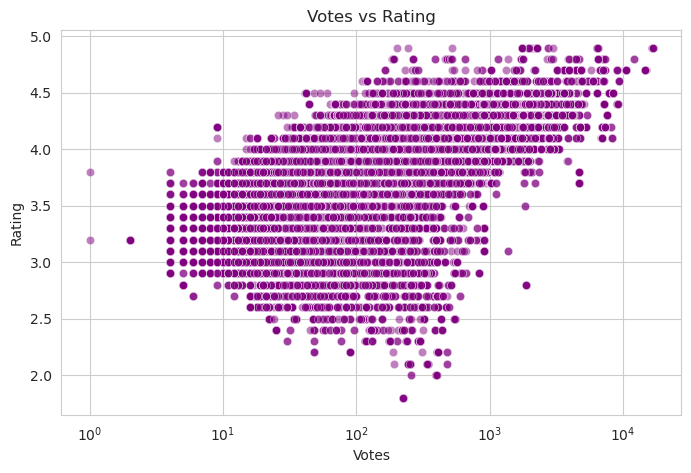

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned['votes'], y=df_cleaned['rate'], alpha=0.5, color='purple')
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.xscale('log') 
plt.show()

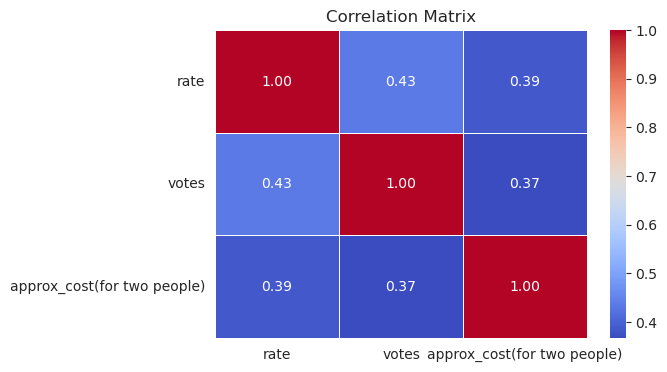

In [11]:
corr_matrix = df_cleaned[['rate', 'votes', 'approx_cost(for two people)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()